# Data Analysis Of Beers Industry

## Table of Contents

* [Business Problem](#business-problem)
* [Objectives](#objectives)
* [Data Description](#data-description)
* [Key Questions to Address](#key-questions-to-address)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Solutions](#solutions)
* [Question 1](#question-1)
* [Question 2](#question-2)
* [Question 3](#question-3)
* [Question 4](#question-4)
* [Question 5](#question-5)

<a name="business-problem"></a>
# Business Problem:

The brewery industry is highly competitive, and breweries are constantly striving to improve their products to meet consumer preferences. To gain a competitive edge, it is crucial for breweries to understand the factors that influence the perception of their beers in the market. Our business problem revolves around leveraging the provided beer ratings dataset to extract valuable insights that can guide breweries in enhancing their beer offerings and overall customer satisfaction.


<div style="text-align:center">
    <img src="https://cdn.sisense.com/wp-content/uploads/beer-buzz-data-helps-buyers-find-brew-featured-1200x628-1.jpg" alt="Image Alt Text" />
</div>


<a name="objectives"></a>
# Objectives:
   - Provide actionable insights for breweries to enhance their beer offerings.
   - Identify potential areas of improvement for breweries based on consumer preferences.
   - Uncover patterns and trends in beer ratings to guide marketing and product development strategies.
   - Develop a comprehensive understanding of the factors influencing customer satisfaction in the beer industry.

<a name="data-description"></a>
# Data Description

The compressed file BeerDataScienceProject.tar.bz2 contains a dataset encompassing information about various beers and their associated reviews. The dataset comprises the following columns:

- **beer_ABV:** Alcohol by volume of the beer.
  
- **beer_beerId:** Unique identifier for each beer.
  
- **beer_brewerId:** Unique identifier for the beer brewer.
  
- **beer_name:** Name of the beer.
  
- **beer_style:** Categorization of the beer's style.
  
- **review_appearance:** Evaluation of the beer's appearance based on reviews.
  
- **review_palette:** Assessment of the beer's palette, focusing on colors.
  
- **review_overall:** Overall rating provided by reviewers for the beer.
  
- **review_taste:** Reviewer's feedback on the taste of the beer.
  
- **review_profileName:** Profile name of the individual providing the review.
  
- **review_aroma:** Review of the beer's aroma by the reviewer.
  
- **review_text:** The complete text of the review.
  
- **review_time:** Timestamp indicating when the review was submitted.

<a name="assignment"></a>
# Key Questions to Address

In this assignment you will work with a beer ratings data set. Please provide an answer to the questions below.
Answer as many questions as possible:
1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

<a name="exploratory-data-analysis"></a>
# Exploratory Data Analysis

We'll start off our project with an exploratory data analysis. The goal of this section is to get familiar with the data set.

This Python code includes imports for handling data with Pandas, performing sentiment analysis using the NLTK library's VADER sentiment intensity analyzer, and setting up visualization tools with Seaborn and Matplotlib. Additionally, it downloads the VADER lexicon, a scored list of words and jargon used by the sentiment analyzer.

In [27]:
import pandas as pd
import numpy as np
import re
# For Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import  datetime

from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# this is a scored list of words and jargon that the sentiment analyser
# uses references when performing sentiment analysis
download("vader_lexicon", quiet=True)


* The dataset comprises 528,870 entries distributed across 13 columns. Among these, two columns are designated as ID columns, namely beer ID and beer brewer ID. The available information encompasses the beers' ABV content, names, and styles. The remaining data pertains to comprehensive beer reviews, encompassing various aspects such as aroma, taste, palette, and appearance. Additionally, the dataset includes details about reviewers' profiles, overall grades, the actual text of their reviews, and the UNIX timestamp indicating when the reviews were posted.

* It appears that the reviews are represented as floating-point numbers within the range of 1 to 5. We will verify this in the subsequent cell.

In [3]:
df = pd.read_csv("../data/BeerDataScienceProject.tar.bz2", compression="bz2", encoding="latin-1")
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


The initial assumptions appear to be accurate. However, it is noteworthy that there are instances of zeros in the overall and appearance reviews. To maintain data accuracy and reliability, it is advisable to disregard these entries, as they likely represent erroneous data.

In [3]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


Upon examining the output from the preceding cell, it's evident that various columns exhibit different non-null counts. To address this discrepancy, a straightforward approach would be to eliminate any rows containing null values. This assumes that, for those particular records, data collection errors may have occurred. Given that the dataset is predominantly complete, this strategy is anticipated to be a pragmatic solution.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528867 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508587 non-null  float64
 1   beer_beerId         528867 non-null  int64  
 2   beer_brewerId       528867 non-null  int64  
 3   beer_name           528867 non-null  object 
 4   beer_style          528867 non-null  object 
 5   review_appearance   528867 non-null  float64
 6   review_palette      528867 non-null  float64
 7   review_overall      528867 non-null  float64
 8   review_taste        528867 non-null  float64
 9   review_profileName  528752 non-null  object 
 10  review_aroma        528867 non-null  float64
 11  review_text         528748 non-null  object 
 12  review_time         528867 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 56.5+ MB


In [4]:
print("The Data Shape is ", df.shape)

The Data Shape is  (528870, 13)


### Eliminating rows with null values from the dataset.

In [5]:
beerData = df.dropna()

### Counting the remaining null values after the elimination for a sanity check.

In [6]:
beerData.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [7]:
print("Data shape after the elimination of null values", beerData.shape)

Data shape after the elimination of null values (508358, 13)


### Removing duplicate entries from the dataset.

If a user has rated the same beer more than once, then only keep their highest rating and remove others.


In [8]:
# Sort by "review_overall" in descending order
beerData = beerData.sort_values('review_overall', ascending=False)

# Keep the highest rating from each "review_profilename" and drop the rest
beerData = beerData.drop_duplicates(subset= ['review_profileName','beer_beerId'], keep='first')

In [9]:
print("Data shape after the removing the duplicate values", beerData.shape)

Data shape after the removing the duplicate values (503700, 13)


### Excluding reviews with ratings less than or equal to 0

Given that ratings are typically on a scale of 1-5, any values in the review variables that are less than 1 are deemed inappropriate for analysis and will be excluded.

In [10]:
beerData = beerData[(beerData['review_overall'] > 0)]
print("Data shape after Excluding reviews with ratings less than or equal to 0 is", beerData.shape)

Data shape after Excluding reviews with ratings less than or equal to 0 is (503697, 13)


<a name="approach"></a>
# Approach
Having familiarized ourselves with the dataset and completed essential pre-processing steps in the previous section, we now pivot towards tackling the inquiries presented in this assignment.

<a name="question-1"></a>
### Question 1
#### Rank top 3 Breweries which produce the strongest beers?

Extracting the relevant columns into new dataframe to use it futher.

In [16]:
abVP_Data = beerData[['beer_brewerId','beer_beerId','beer_name', 'beer_ABV']]
abVP_Data.head()

,beer_brewerId,beer_beerId,beer_name,beer_ABV
492945,132,1339,Hazelnut Brown Nectar,6.2
172728,221,689,Red Stripe Jamaican Lager,4.7
409699,694,15881,TrÃ¶egs Nugget Nectar,7.5
517331,113,571,Samuel Smith's Oatmeal Stout,5.0
172704,221,689,Red Stripe Jamaican Lager,4.7


Applying aggregations over a "beer_ABV" with resoect to "beer_brewerId" and "beer_beerId"

In [17]:
aggrAbvDf = abVP_Data.groupby(['beer_brewerId', 'beer_beerId']).agg({'beer_ABV': [np.size, np.mean]})

Here, the size is corresponds to the number of review logged per unique beer_beerId and

the mean value tells the mean of the beer_ABV value recorder in the review

In [18]:
aggrAbvDf.head(5)

beer_ABV     
                              size mean
beer_brewerId beer_beerId              
1             429             1220  4.4
              5916              46  5.0
              14348              6  5.0
              19099              4  4.2
              19123              7  4.1

Now aggregating on a brewery level i.e 'beer_ABV' mean for each brewery

In [20]:
beer_ABVmeanDf = aggrAbvDf.groupby(level='beer_brewerId').mean()
beer_ABVmeanDf.columns = ('mean_size', 'mean_beer_ABV')
beer_ABVmeanDf.head(5)

,mean_size,mean_beer_ABV
beer_brewerId,,
1,101.538462,4.876923
3,123.425000,6.237500
5,69.000000,4.837500
10,14.000000,4.625000
14,8.983871,6.588710


fropping the column 'mean_size' and sorting the dataframe in desceding order

In [21]:
sorted_beer_ABVmeanDf = beer_ABVmeanDf.drop('mean_size', 1).sort_values('mean_beer_ABV', ascending=False).reset_index()

/tmp/ipykernel_22879/1567863189.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sorted_beer_ABVmeanDf = beer_ABVmeanDf.drop('mean_size', 1).sort_values('mean_beer_ABV', ascending=False).reset_index()



This line of code generates a boxplot using Seaborn, visualizing the distribution of values in the 'mean_beer_ABV' column from the DataFrame named 'sorted_beer_ABVmeanDf'.

<Axes: >

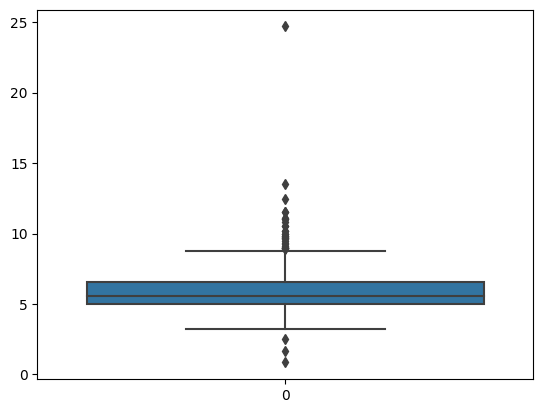

In [22]:
sns.boxplot(data=sorted_beer_ABVmeanDf['mean_beer_ABV'])

Below are the top 3 Breweries producing strongest beers considering anomalous value of 24.69% for brewery "6513"

In [23]:
sorted_beer_ABVmeanDf.head(3)

,beer_brewerId,mean_beer_ABV
0,6513,24.690000
1,736,13.500000
2,24215,12.466667


### Observations:
1. Based on the visualization, it's evident that the majority of breweries produce beers with an Alcohol By Volume (ABV) around 6%.
2. The box plot highlights an outlier with an ABV value of approximately 25% for the beer_brewerId "6513." This value significantly surpasses the mean ABV for the dataset.
3. It's important to acknowledge the slight possibility that the actual strongest beer could be associated with a null value in the "beer_ABV" column. Further investigation may be warranted to address this potential scenario.

<a name="question-2"></a>
## Question 2

Which year did beers enjoy the highest ratings ?

Extracting the relevant columns into new dataframe to use it futher.

In [25]:
review_Data = beerData[['beer_beerId','beer_name','review_overall','review_time']]

In [28]:
review_Data['review_year'] = review_Data.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)

/tmp/ipykernel_22879/1535008746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_Data['review_year'] = review_Data.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)


In [29]:
review_Data = review_Data.reset_index(drop=True)

In [30]:
review_Data.head(5)

,beer_beerId,beer_name,review_overall,review_time,review_year
0,1339,Hazelnut Brown Nectar,5.0,1221003321,2008
1,689,Red Stripe Jamaican Lager,5.0,1129192511,2005
2,15881,TrÃ¶egs Nugget Nectar,5.0,1235006981,2009
3,571,Samuel Smith's Oatmeal Stout,5.0,1203476701,2008
4,689,Red Stripe Jamaican Lager,5.0,1135296352,2005


This code calculates the mean of the 'review_overall' column for each unique 'review_year' in the 'review_Data' DataFrame and stores the aggregated results in the 'aggrReview_Data' DataFrame. The `.head()` function is then used to display the first few rows of the resulting DataFrame.

In [31]:
aggrReview_Data = review_Data.groupby(['review_year'], as_index=False)['review_overall'].agg('mean')
aggrReview_Data.head()

,review_year,review_overall
0,1998,4.045455
1,1999,4.000000
2,2000,4.241379
3,2001,3.963687
4,2002,3.822060


sorting the dataframe in desceding order

In [32]:
# sorting the dataframe in desceding order
aggrReview_Data = aggrReview_Data.sort_values(by=['review_overall'], ascending=False)
aggrReview_Data.head(5)

,review_year,review_overall
2,2000,4.241379
0,1998,4.045455
1,1999,4.000000
3,2001,3.963687
12,2010,3.869730


This code creates a bar plot using Matplotlib, displaying the average 'review_overall' ratings for each 'review_year' from the 'aggrReview_Data' DataFrame.

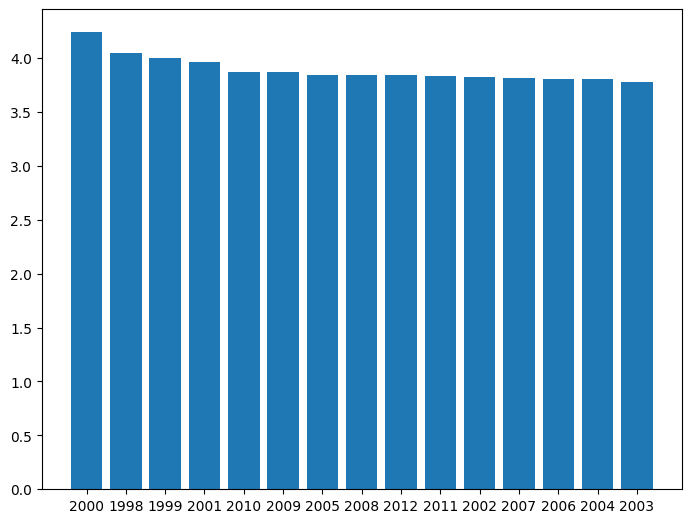

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(aggrReview_Data.review_year,aggrReview_Data.review_overall)
plt.show()

### Observation:
1. Based on the bar plot above, it can be inferred that in the year 2000, beers received the highest overall ratings, with an average rating of "4.241379."

<a name="question-3"></a>
## Question 3

Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [34]:
beerRatingsDf = beerData[['beer_beerId', 'review_appearance', 'review_palette','review_taste', 'review_aroma', 'review_overall']]
beerRatingsDf.head()

,beer_beerId,review_appearance,review_palette,review_taste,review_aroma,review_overall
492945,1339,4.5,3.0,4.5,5.0,5.0
172728,689,5.0,3.0,4.5,4.0,5.0
409699,15881,4.0,4.0,4.5,4.5,5.0
517331,571,4.5,4.5,4.5,4.5,5.0
172704,689,3.0,3.5,4.0,5.0,5.0


This code aggregates beer ratings data from the 'beerRatingsDf' DataFrame, grouping by 'beer_beerId' and calculating counts and means for various review aspects. The resulting DataFrame is assigned to 'beerRatingsAggrDf', and the column names are then renamed for clarity. The `.head()` function is used to display the first few rows of the resulting DataFrame.

In [35]:
beerRatingsAggrDf = beerRatingsDf.groupby('beer_beerId').agg(
        {'beer_beerId':'count',
         'review_aroma':'mean',
         'review_taste':'mean',
         'review_appearance':'mean',
         'review_palette':'mean',
        'review_overall':'mean'})

beerRatingsAggrDf.columns = ('beer_beerId_count','review_aroma','review_taste','review_appearance','review_palette','review_overall')
beerRatingsAggrDf.head()

,beer_beerId_count,review_aroma,review_taste,review_appearance,review_palette,review_overall
beer_beerId,,,,,,
5,420,3.342857,3.323810,3.488095,3.208333,3.554762
6,871,3.645809,3.514351,3.839839,3.517222,3.709529
7,655,3.103817,3.110687,3.251145,3.178626,3.271756
8,68,3.235294,3.301471,3.294118,3.080882,3.647059
9,116,3.043103,3.103448,3.051724,2.853448,3.400862


Lets observe the correlation between columns.

Calculate the Pearson's correlation coeff and plot a heatmap.

In [36]:
corVals = beerRatingsAggrDf.corr()
corVals = corVals.iloc[1:6,1:6]
corVals

,review_aroma,review_taste,review_appearance,review_palette,review_overall
review_aroma,1.000000,0.835014,0.660198,0.825980,0.883830
review_taste,0.835014,1.000000,0.682245,0.756271,0.823196
review_appearance,0.660198,0.682245,1.000000,0.669227,0.637603
review_palette,0.825980,0.756271,0.669227,1.000000,0.766905
review_overall,0.883830,0.823196,0.637603,0.766905,1.000000


masking the upper diagonal matrix

In [38]:
upperMask = np.zeros_like(corVals)
upperMask[np.triu_indices_from(upperMask, k=1)] = True

This code creates a heatmap using Seaborn to visualize Pearson's correlation coefficients stored in the 'corVals' matrix. The 'mask' parameter is applied to display only the upper triangular part of the matrix, and annotations are included. The plot is titled "Pearson's Correlation Coefficients."

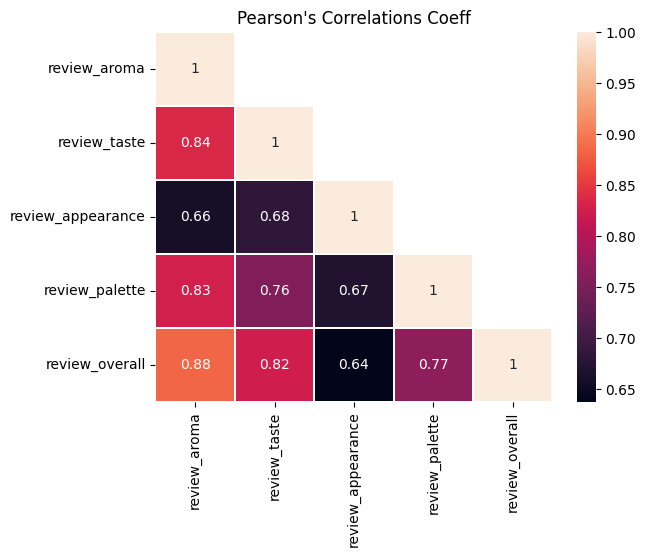

In [39]:
sns.heatmap(corVals, mask=upperMask, annot=True, linewidths=.3)
plt.title("Pearson's Correlations Coeff")
plt.show()

### Observations:
1. The heatmap above suggests that the key factors influencing the overall rating of beers are aroma (0.88), followed by taste (0.82), palette (0.77), and appearance (0.64). These correlation coefficients indicate the strength and direction of the relationships between these variables and the overall rating.

<a name="question-4"></a>
# Question 4

If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

Upon reviewing the dataset, it appears that the 'review_overall' field is a suitable metric for ranking beers. While other features focus more on evaluating specific attributes of the beers, the overall review provides a comprehensive assessment that can serve as a robust basis for ranking.

Chosing the relevant features to analyze


In [40]:
recommendData = beerData[['beer_brewerId','beer_beerId','beer_name','beer_ABV', 'beer_style', 'review_overall']]

Counting the number of the reviews with fresoect to each beer

In [41]:
recommendData['review_count'] = recommendData.groupby(['beer_beerId'])['review_overall'].transform('count')

/tmp/ipykernel_22879/4227454575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendData['review_count'] = recommendData.groupby(['beer_beerId'])['review_overall'].transform('count')


In [42]:
recommendData.review_count.mean()

624.2821477991729

Plotting Histogram to visualise the distribution review_count 

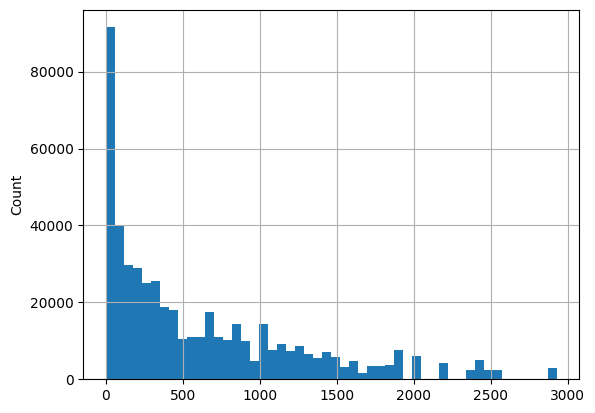

In [43]:
recommendData.review_count.hist(bins=50)
plt.ylabel('Count')
plt.show()

calculating mean review_overall value for each beer Id 

In [44]:
recommendData['review_overall_mean'] = recommendData.groupby(['beer_beerId'])['review_overall'].transform('mean')

/tmp/ipykernel_22879/1564388399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendData['review_overall_mean'] = recommendData.groupby(['beer_beerId'])['review_overall'].transform('mean')


Considering 1/4 th of avg review count to filter

In [45]:
filteredRecommendData = recommendData[recommendData.review_count >= 150]

The top 3 suggestions are as below

In [46]:
aggrFilteredRecommendData = filteredRecommendData.groupby('beer_beerId').head(1).sort_values('review_overall_mean', ascending=False )
aggrFilteredRecommendData.head(3)

,beer_brewerId,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_count,review_overall_mean
334964,14064,56082,Citra DIPA,8.0,American Double / Imperial IPA,5.0,246,4.630081
484119,388,36316,Cantillon BlÃ¥bÃ¦r Lambik,5.0,Lambic - Fruit,5.0,155,4.625806
378552,27039,16814,Heady Topper,8.0,American Double / Imperial IPA,5.0,443,4.623025


<a name="question-5"></a>
## Question 5

Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for that beer style?

Instantiating Sentiment Analyzer

In [34]:
analyser = SentimentIntensityAnalyzer()

Considering only relevant columns

In [42]:
reviewTextData = df[['beer_beerId','beer_name','beer_ABV','beer_style','review_overall','review_text']]

lets consider the higher reviews only to calculate the polarity score of review_text and compare it with overall review

In [43]:
reviewTextData = reviewTextData.loc[reviewTextData['review_overall'] >= 4]

Resetting Index

In [44]:
reviewTextData.reset_index(drop=True,inplace=True)
reviewTextData.head(2)

,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_text
0,64883,Cauldron DIPA,7.7,American Double / Imperial IPA,4.0,"According to the website, the style for the Ca..."
1,52159,Caldera Ginger Beer,4.7,Herbed / Spiced Beer,4.0,I'm not sure why I picked this up... I like gi...


Printing some random reviews to observe the review text

In [45]:
reviewTextData.review_text[0]

"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bi

### Text Preprocessing

Initial text processing to deconstruct the short forms

In [55]:
def decontracted(phrase):
    # # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

This code snippet uses the `tqdm` library to display a progress bar during the loop. It preprocesses text data in the 'review_text' column of the 'reviewTextData' DataFrame, removing numeric characters and applying a decontraction function ('decontracted'). The preprocessed sentences are then stored in the 'preprocessed_reviews' list. Additionally, there's a print statement to handle non-string values during the loop.

In [60]:
from tqdm import tqdm
# Assuming reviewTextData is your DataFrame
reviewTextData = reviewTextData.dropna(subset=['review_text'])

# Now, you can proceed with your text processing loop
preprocessed_reviews = []

for sentence in tqdm(reviewTextData['review_text'].values):
    if isinstance(sentence, str):
        sentence = decontracted(sentence)
        sentence = re.sub("\S*\d\S*", "", sentence).strip()
        preprocessed_reviews.append(sentence)
    else:
        # Handle the case where the sentence is not a string (optional)
        print(f"Skipped non-string value: {sentence}")


100%|██████████| 338410/338410 [00:15<00:00, 22544.80it/s]


In [61]:
#Appending preprocessed reviews to the filtered dataframe
reviewTextData['preprocessed_review_text'] = preprocessed_reviews

/tmp/ipykernel_50555/320853897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewTextData['preprocessed_review_text'] = preprocessed_reviews


In [62]:
reviewTextData.review_text[0]

"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bi

loop over the 'preprocessed_review_text' column and calculate the polarity score for each review. 

In [66]:
reviewTextData['polarity_score2'] = reviewTextData['preprocessed_review_text'].apply(lambda x: analyser.polarity_scores(x)['compound'])

/tmp/ipykernel_50555/2910192002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewTextData['polarity_score2'] = reviewTextData['preprocessed_review_text'].apply(lambda x: sianalyzer.polarity_scores(x)['compound'])


Groupping by the 'beer_beerId' and calculate mean polarity score.

In [67]:
reviewTextDataGroupped = reviewTextData.groupby('beer_style')['polarity_score2'].mean()

Lets Sort the groupped data by mean polarity score

In [68]:
reviewTextDataGroupped.sort_values(ascending=False)[0:5]

beer_style
Braggot                      0.924828
Happoshu                     0.921055
Dortmunder / Export Lager    0.905423
Wheatwine                    0.897439
Quadrupel (Quad)             0.893216
Name: polarity_score2, dtype: float64

1. By Observing the mean compund ploarity score , we can say that the beer style "Braggot" is quite most famous.
2. By Observing the mean compund ploarity score calculated we can get an idea how the user written review text is collaborating in calculating the overall review score.